## library yang digunakan

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

##Load DataSet

In [22]:
data = pd.read_csv('Dataset/dataset_spam_sms.csv')
data.head()

,teks,label
0,Selamat! Kamu pengguna baru terpilih yang bisa...,2
1,Paket data HEMAT 50%! Dapatkan 10ribu GoPay Co...,2
2,Beriklan di WABA anti ribet pake MyAds yuk! Tu...,2
3,"Dapatkan paket data terbaik, 20GB cuma 40rb ut...",2
4,EXTRA KUOTA 3.75GB HANYA DI APLIKASI myIM3! Yu...,2


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   teks    201 non-null    object
 1   label   201 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.3+ KB


In [24]:
data.describe()

,label
count,201.000000
mean,0.756219
std,0.833831
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


## Text Preprocessing

## Case Folding

In [25]:
import re

# membuat fungsi untuk case folding(melakukan pembersihan data)
def casefolding(text):
    text = text.lower() # merubah kaliamt menjadi huruf kecil
    text = re.sub(r'https?://\S+ www\.\S+', '', text) #menghapus url dari kalimat
    text = re.sub(r'[-+]?[0-9]+', '', text) # melakukan penghapusan data dari kalimat
    text = re.sub(r'[^\w\s]', '', text) #melakukan penghapusan tanda baca
    text = text.strip()
    return text

In [26]:
raw_sample = data['teks'].iloc[4]  
# Mengambil baris ke-5 (index 4) dari kolom 'teks' dalam DataFrame bernama data, lalu disimpan ke variabel raw_sample

case_folding = casefolding(raw_sample)  
# Memanggil fungsi casefolding() untuk membersihkan teks dari raw_sample, lalu hasilnya disimpan ke variabel case_folding

print('Raw data\t : ', raw_sample)  
# Menampilkan teks asli (sebelum diproses) ke layar

print('Case Folding\t :', case_folding)  
# Menampilkan hasil teks setelah dilakukan pembersihan (case folding)


Raw data	 :  EXTRA KUOTA 3.75GB HANYA DI APLIKASI myIM3! Yuk cek kode refferlamu & bagikan utk ambil kuotanya! Info: myim3.co/mgma
Case Folding	 : extra kuota gb hanya di aplikasi myim yuk cek kode refferlamu  bagikan utk ambil kuotanya info myimcomgma


## Word Normalization

In [27]:
key_norm = pd.read_csv('Dataset/key_norm.csv')  
# Membaca file CSV bernama 'key_norm.csv' yang berisi data normalisasi teks (singkatan dan hasil lengkapnya), lalu disimpan ke variabel key_norm

def text_normalize(text):
    # Fungsi untuk melakukan normalisasi teks berdasarkan padanan kata dari file key_norm.csv
    
    text = ' '.join([
        key_norm[key_norm['singkat'] == word]['hasil'].values[0]  # Jika ditemukan padanan kata, ambil hasil normalisasi
        if (key_norm['singkat'] == word).any()  # Cek apakah kata 'word' ada dalam kolom 'singkat'
        else word  # Jika tidak ada, biarkan kata tetap
        for word in text.split()  # Memproses tiap kata dalam kalimat (dipisah berdasarkan spasi)
    ])
    
    text = str.lower(text)  
    # Mengubah seluruh hasil teks menjadi huruf kecil
    
    return text  
    # Mengembalikan teks yang sudah dinormalisasi


In [28]:

raw_data = data['teks'].iloc[112]  
# Mengambil data mentah dari baris ke-113 (indeks 112) pada kolom 'teks' dari DataFrame 'data', disimpan ke variabel raw_data

word_normal = text_normalize(case_folding)  
# Melakukan normalisasi teks (mengganti kata tidak baku dengan bentuk bakunya) dari hasil 'case_folding' sebelumnya, lalu disimpan ke variabel word_normal

print('Raw Data\t :', raw_data)  
# Menampilkan teks mentah (belum diproses) ke layar

print('Word Normalize\t:', word_normal)  
# Menampilkan hasil teks setelah dilakukan normalisasi kata


Raw Data	 : Aamiin. Makasih semuanya..semoga teman2 cepat nyusul dan semoga segala urusannya diberikan kelancaran oleh Allah.aamiin
Word Normalize	: extra kuota gb hanya di aplikasi myim yuk cek kode refferlamu bagikan untuk ambil kuotanya informasi myimcomgma


## Proses Filtering(Stopword Removal)

In [29]:
from nltk.tokenize import sent_tokenize, word_tokenize  
# Mengimpor fungsi untuk memecah teks menjadi kalimat (sent_tokenize) dan kata (word_tokenize) dari pustaka NLTK (Natural Language Toolkit)

from nltk.corpus import stopwords  
# Mengimpor daftar stopword (kata-kata umum yang biasanya diabaikan dalam analisis teks, seperti "yang", "dan", "di", dll.)

stopwords_ind = stopwords.words('indonesian')  
# Mengambil daftar stopword bahasa Indonesia dari NLTK dan menyimpannya ke dalam variabel stopwords_ind


In [30]:
len(stopwords_ind)
# Menghitung jumlah kata stopword dalam daftar stopwords bahasa Indonesia yang telah dimuat dari NLTK


758

In [31]:
# melihat daftar stopword dari nltk
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [32]:
more_stopword = ['tsel', 'gb', 'rb', 'btw']  
# Menambahkan daftar stopword khusus tambahan buatan sendiri, misalnya kata-kata tidak penting atau singkatan umum yang ingin dibuang

stopwords_ind = stopwords_ind + more_stopword  
# Menggabungkan stopword dari NLTK dengan daftar stopword tambahan ke dalam satu list stopwords_ind

def remove_stop_word(text):
    clean_words = []  # Membuat list kosong untuk menyimpan kata-kata yang lolos dari filter stopword

    text = text.split()  # Memecah teks menjadi list kata (berdasarkan spasi)

    for word in text:
        if word not in stopwords_ind:  # Cek apakah kata bukan stopword
            clean_words.append(word)  # Jika bukan, masukkan ke list clean_words

    return " ".join(clean_words)  # Menggabungkan kembali list kata jadi kalimat (dengan spasi antar kata)


In [33]:
raw_sample = data['teks'].iloc[112]  
# Mengambil data teks pada baris ke-113 (indeks 112) dari kolom 'teks' dalam DataFrame dan menyimpannya ke variabel raw_sample

case_folding = casefolding(raw_sample)  
# Melakukan proses pembersihan teks (mengubah ke huruf kecil, menghapus URL, angka, tanda baca, dll.)

stopword_removal = remove_stop_word(case_folding)  
# Menghapus kata-kata umum (stopword) dari hasil case folding dengan fungsi remove_stop_word()

print('Raw Data \t\t :', raw_data)  
# Menampilkan data mentah asli (variabel raw_data — meskipun di sini sebenarnya kamu ambil raw_sample, bukan raw_data)

print('Case Folding \t\t :', case_folding)  
# Menampilkan hasil teks setelah dilakukan case folding (pembersihan)

print('StopWord Removal \t\t: ', stopword_removal)  
# Menampilkan hasil teks setelah stopword dihapus


Raw Data 		 : Aamiin. Makasih semuanya..semoga teman2 cepat nyusul dan semoga segala urusannya diberikan kelancaran oleh Allah.aamiin
Case Folding 		 : aamiin makasih semuanyasemoga teman cepat nyusul dan semoga segala urusannya diberikan kelancaran oleh allahaamiin
StopWord Removal 		:  aamiin makasih semuanyasemoga teman cepat nyusul semoga urusannya kelancaran allahaamiin


## Steaming

In [34]:
!pip -q install sastrawi

In [35]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  
# Mengimpor StemmerFactory dari library Sastrawi, yang digunakan untuk melakukan stemming (mengubah kata menjadi bentuk dasarnya)

factory = StemmerFactory()  
# Membuat objek factory dari kelas StemmerFactory

stemmer = factory.create_stemmer()  
# Menggunakan factory untuk membuat objek stemmer, yaitu alat yang akan melakukan proses stemming

def steaming(text):
    text = stemmer.stem(text)  # Mengubah setiap kata dalam teks menjadi bentuk dasarnya menggunakan stemmer dari Sastrawi
    return text  # Mengembalikan teks hasil stemming


In [36]:
# Merubah kata menjadi kata dasar
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Membuat fungsi untuk steaming bahasa Indonesia
def steaming(text):
    text = stemmer.stem(text)
    return text

# Menggunakan nama kolom yang benar, pastikan nama kolom sesuai dengan data Anda
raw_sample = data['teks'].iloc[112]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_word(case_folding)
text_stemming = steaming(stopword_removal)  # Gunakan nama fungsi yang konsisten

print('Raw Data \t\t :', raw_sample)
print('Case Folding \t\t :', case_folding)
print('StopWord Removal \t\t:', stopword_removal)
print('Stemming \t\t :', text_stemming)


Raw Data 		 : Aamiin. Makasih semuanya..semoga teman2 cepat nyusul dan semoga segala urusannya diberikan kelancaran oleh Allah.aamiin
Case Folding 		 : aamiin makasih semuanyasemoga teman cepat nyusul dan semoga segala urusannya diberikan kelancaran oleh allahaamiin
StopWord Removal 		: aamiin makasih semuanyasemoga teman cepat nyusul semoga urusannya kelancaran allahaamiin
Stemming 		 : aamiin makasih semuanyasemoga teman cepat nyusul moga urus lancar allahaamiin


## Text Preprocessing

In [37]:
# membuat fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
    text = casefolding(text)
    text = text_normalize(text)
    text = remove_stop_word(text)
    text = steaming(text)
    return text

In [38]:
%%time
#skrip untuk mengeksekusi seluruh data 
data['clean_text'] = data['teks'].apply(text_preprocessing_process)


CPU times: total: 17.3 s
Wall time: 51.8 s


In [39]:
data

,teks,label,clean_text
0,Selamat! Kamu pengguna baru terpilih yang bisa...,2,selamat guna pilih klaim extra kuota myim
1,Paket data HEMAT 50%! Dapatkan 10ribu GoPay Co...,2,paket data hemat dapat ribu gopay coins transa...
2,Beriklan di WABA anti ribet pake MyAds yuk! Tu...,2,iklan waba anti ribet pakai myads yuk tutor mu...
3,"Dapatkan paket data terbaik, 20GB cuma 40rb ut...",2,dapat paket data baik aktif sekarangbei beli w...
4,EXTRA KUOTA 3.75GB HANYA DI APLIKASI myIM3! Yu...,2,extra kuota aplikasi myim yuk cek kode refferl...
...,...,...,...
196,Besok mau ke kampus lagi ga?,0,besok kampus
197,Besok saya ada rapat dinas.. Selasa aja ya...,0,besok rapat dinas selasa ya
198,Besok siang ya jam 2,0,besok siang ya jam
199,Besok yuk dua jam bih dari jam 4-6,0,besok yuk jam bih jam


In [40]:
# simpan data yang sudah di preprocessing ke dalam file csv
data.to_csv('clean_data.csv')

## Feature Engineering

In [41]:
#ini adalah data clean nya
# pisahkan kolom feature dan target

X = data['clean_text']
#y ini adalah target labelnya
Y = data['label']


In [42]:
X

0              selamat guna pilih klaim extra kuota myim
1      paket data hemat dapat ribu gopay coins transa...
2      iklan waba anti ribet pakai myads yuk tutor mu...
3      dapat paket data baik aktif sekarangbei beli w...
4      extra kuota aplikasi myim yuk cek kode refferl...
                             ...                        
196                                         besok kampus
197                          besok rapat dinas selasa ya
198                                   besok siang ya jam
199                                besok yuk jam bih jam
200                           beu atuh nunggu pulang ppl
Name: clean_text, Length: 201, dtype: object

In [43]:
Y 

0      2
1      2
2      2
3      2
4      2
      ..
196    0
197    0
198    0
199    0
200    0
Name: label, Length: 201, dtype: int64

## Feature Extraction (TF-IDF dan N-Gram)

In [44]:
# save model
import pickle
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

#Unigram
vec_TF_IDF = TfidfVectorizer(ngram_range=(1,1))
vec_TF_IDF.fit(X)

x_tf_idf = vec_TF_IDF.transform(X)

pickle.dump(vec_TF_IDF.vocabulary_,open("feature_tf-idf.sav", "wb"))

In [45]:
# menampilkan vocabulary dari tif-idf
vec_TF_IDF.vocabulary_

{'selamat': 799,
 'guna': 328,
 'pilih': 694,
 'klaim': 471,
 'extra': 278,
 'kuota': 498,
 'myim': 608,
 'paket': 673,
 'data': 210,
 'hemat': 352,
 'dapat': 206,
 'ribu': 762,
 'gopay': 318,
 'coins': 195,
 'transaksi': 934,
 'pakai': 672,
 'iklan': 377,
 'waba': 984,
 'anti': 47,
 'ribet': 761,
 'myads': 605,
 'yuk': 1041,
 'tutor': 957,
 'mudah': 601,
 'langsung': 510,
 'dapet': 207,
 'green': 323,
 'thick': 914,
 'cek': 182,
 'myadsidmyadstips': 606,
 'baik': 85,
 'aktif': 19,
 'sekarangbei': 798,
 'beli': 114,
 'wa': 983,
 'klik': 473,
 'httpsindiraimcomhpim': 369,
 'aplikasi': 52,
 'kode': 475,
 'refferlamu': 748,
 'bagi': 83,
 'ambil': 32,
 'informasi': 383,
 'myimcomgma': 609,
 'ekstra': 263,
 'pulsa': 733,
 'internet': 391,
 'bulan': 161,
 'mytelkomsel': 610,
 'sjk': 832,
 'augsept': 75,
 'detail': 223,
 'promo': 722,
 'tselmemytsel': 944,
 'iring': 399,
 'tarif': 882,
 'rupiah': 771,
 'panjang': 677,
 'hits': 358,
 'armada': 57,
 'curi': 200,
 'hati': 346,
 'tekan': 894,
 'o

In [46]:
# melihat jumlah feature
print(len(vec_TF_IDF.get_feature_names_out()))

1045


In [47]:
# melihat fitur apasaja yang ada didalam corpus
print(vec_TF_IDF.get_feature_names_out())

['aamiin' 'ab' 'adik' ... 'yuni' 'zjt' 'zona']


In [48]:
x1 = vec_TF_IDF.transform(X).toarray()  # Mengubah data teks menjadi array TF-IDF
data_tabular_tf_idf = pd.DataFrame(x1, columns=vec_TF_IDF.get_feature_names_out())  # Menjadikan array TF-IDF ke bentuk tabel
data_tabular_tf_idf  # Menampilkan tabel TF-IDF


,aamiin,ab,adik,adminlte,adu,aduh,affc,agam,agen,agustus,...,yah,yani,yellow,yk,yogya,yrkz,yuk,yuni,zjt,zona
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.244043,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.263767,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.433615,0.0,0.0,0.0


In [49]:
data_tabular_tf_idf.iloc[10:20,60:70]

,asa,asam,asisten,ass,assalamu,assalamualaikum,assmaaf,asssy,atas,ato
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Selection

In [50]:
x_train = np.array(data_tabular_tf_idf)  # Mengubah DataFrame TF-IDF menjadi array NumPy untuk fitur pelatihan
y_train = np.array(Y)  # Mengubah label Y menjadi array NumPy untuk target pelatihan


In [51]:
from sklearn.feature_selection import SelectKBest  # Import untuk seleksi fitur terbaik
from sklearn.feature_selection import chi2  # Import metode chi-square untuk seleksi fitur

chi2_feature = SelectKBest(chi2, k=3000)  # Pilih 3000 fitur terbaik berdasarkan chi-square
x_kbest_feature = chi2_feature.fit_transform(x_train, y_train)  # Transformasi data menggunakan fitur terbaik

print('Original Feature Number', x_train.shape[1])  # Jumlah fitur sebelum seleksi
print('Reduced Feature Number', x_kbest_feature.shape[1])  # Jumlah fitur setelah seleksi


Original Feature Number 1045
Reduced Feature Number 1045


c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:782: UserWarning: k=3000 is greater than n_features=1045. All the features will be returned.
  warnings.warn(


In [52]:
Data = pd.DataFrame(chi2_feature.scores_,columns=['Nilai'])
Data

,Nilai
0,0.793829
1,0.806050
2,0.697112
3,0.514024
4,0.845588
...,...
1040,1.165596
1041,0.539565
1042,0.436922
1043,0.806050


In [53]:
# menampilkan data feature beserta nilainya
feature = vec_TF_IDF.get_feature_names_out()
feature

Data['Fitur'] = feature
Data

,Nilai,Fitur
0,0.793829,aamiin
1,0.806050,ab
2,0.697112,adik
3,0.514024,adminlte
4,0.845588,adu
...,...,...
1040,1.165596,yrkz
1041,0.539565,yuk
1042,0.436922,yuni
1043,0.806050,zjt


In [54]:
# mengurutkan nilai feature terbaik
Data.sort_values(by= 'Nilai', ascending=False)

,Nilai,Fitur
147,11.068514,bonus
428,10.848596,jt
372,8.924487,hubung
673,8.820395,paket
322,7.052278,gratis
...,...,...
510,0.083448,langsung
201,0.047964,daftar
588,0.028082,minggu
165,0.020317,butuh


In [55]:
mask = chi2_feature.get_support()
mask

array([ True,  True,  True, ...,  True,  True,  True], shape=(1045,))

In [56]:
# menampilkan fitur fitur yang terpilih berdasarkan nilai mask atau niai tertinggi yang sudah ditetapkan pada chisquare
new_feature =[]
for bool, f in zip(mask, feature):
    if bool :
        new_feature.append(f)
    selected_feature = new_feature
selected_feature

        

['aamiin',
 'ab',
 'adik',
 'adminlte',
 'adu',
 'aduh',
 'affc',
 'agam',
 'agen',
 'agustus',
 'ah',
 'aigoo',
 'air',
 'aja',
 'ajak',
 'ajakin',
 'akademik',
 'akang',
 'akses',
 'aktif',
 'aktivasi',
 'ala',
 'alaikumsaya',
 'alaiqum',
 'alam',
 'alamat',
 'alesannya',
 'alhamdulillah',
 'alhamdullilah',
 'allah',
 'allahaamiin',
 'aman',
 'ambil',
 'an',
 'anabdullah',
 'anak',
 'and',
 'andasyaratcopy',
 'andipublishercompobnibank',
 'andri',
 'androidmu',
 'aneka',
 'ang',
 'anggar',
 'angka',
 'angpaopoinsenyum',
 'anomali',
 'anti',
 'anyar',
 'anyonghaseyo',
 'ap',
 'apa',
 'aplikasi',
 'app',
 'appleplay',
 'april',
 'argo',
 'armada',
 'artha',
 'as',
 'asa',
 'asam',
 'asisten',
 'ass',
 'assalamu',
 'assalamualaikum',
 'assmaaf',
 'asssy',
 'atas',
 'ato',
 'atuh',
 'atuhlah',
 'atulah',
 'aty',
 'aug',
 'augsept',
 'axis',
 'axisnet',
 'ayah',
 'ayam',
 'ayo',
 'ayu',
 'baberque',
 'bagi',
 'bahagia',
 'baik',
 'bakarkremes',
 'bal',
 'balas',
 'balon',
 'bandung',
 'ba

In [57]:
# membuat vocabulary baru berdasarkan fitur yang terseleksi
new_selected_feature = {}

for(k,v) in vec_TF_IDF.vocabulary_.items():
    if k in selected_feature:
        new_selected_feature[k]=v
    
new_selected_feature

{'selamat': 799,
 'guna': 328,
 'pilih': 694,
 'klaim': 471,
 'extra': 278,
 'kuota': 498,
 'myim': 608,
 'paket': 673,
 'data': 210,
 'hemat': 352,
 'dapat': 206,
 'ribu': 762,
 'gopay': 318,
 'coins': 195,
 'transaksi': 934,
 'pakai': 672,
 'iklan': 377,
 'waba': 984,
 'anti': 47,
 'ribet': 761,
 'myads': 605,
 'yuk': 1041,
 'tutor': 957,
 'mudah': 601,
 'langsung': 510,
 'dapet': 207,
 'green': 323,
 'thick': 914,
 'cek': 182,
 'myadsidmyadstips': 606,
 'baik': 85,
 'aktif': 19,
 'sekarangbei': 798,
 'beli': 114,
 'wa': 983,
 'klik': 473,
 'httpsindiraimcomhpim': 369,
 'aplikasi': 52,
 'kode': 475,
 'refferlamu': 748,
 'bagi': 83,
 'ambil': 32,
 'informasi': 383,
 'myimcomgma': 609,
 'ekstra': 263,
 'pulsa': 733,
 'internet': 391,
 'bulan': 161,
 'mytelkomsel': 610,
 'sjk': 832,
 'augsept': 75,
 'detail': 223,
 'promo': 722,
 'tselmemytsel': 944,
 'iring': 399,
 'tarif': 882,
 'rupiah': 771,
 'panjang': 677,
 'hits': 358,
 'armada': 57,
 'curi': 200,
 'hati': 346,
 'tekan': 894,
 'o

In [58]:
len(new_selected_feature)  # Menghitung jumlah fitur yang dipilih (panjang list new_selected_feature)


1045

In [59]:
pickle.dump(new_selected_feature, open("new_selected_feature_tf-idf.sav", "wb"))  # Menyimpan fitur terpilih ke file .sav menggunakan pickle


In [60]:
# menampilkan fitur-fitur yang sudah diseleksi 
data_selected_feature = pd.DataFrame(x_kbest_feature, columns=selected_feature)
data_selected_feature

,aamiin,ab,adik,adminlte,adu,aduh,affc,agam,agen,agustus,...,yah,yani,yellow,yk,yogya,yrkz,yuk,yuni,zjt,zona
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.244043,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.263767,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.433615,0.0,0.0,0.0


## Pembuatan Modelling(SVM)

In [61]:
#supervised learning ini
selected_x = x_kbest_feature
selected_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(201, 1045))

In [62]:
# import library
import random
from sklearn.model_selection import train_test_split

#import algoritma SVM
from sklearn.svm import SVC  # Support Vector Classification


In [63]:
x = selected_x  # Menetapkan fitur terpilih ke variabel x
y = data.label  # Menetapkan label target ke variabel y

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)  
# Membagi data menjadi data latih dan data uji dengan proporsi 80:20


In [64]:
#menampilkan jumlah data training danb data testing
print('Banyaknya X-tarining :', len(x_train))
print('Banyaknya X-test :', len(x_test))
print('Banyaknya Y-tarining :', len(y_train))
print('Banyaknya Y-test :', len(y_test))

Banyaknya X-tarining : 160
Banyaknya X-test : 41
Banyaknya Y-tarining : 160
Banyaknya Y-test : 41


In [65]:
text_algorithm = SVC(kernel='linear')  # Membuat model klasifikasi SVM dengan kernel linear


In [66]:
model = text_algorithm.fit(x_train, y_train)  # Melatih model SVM dengan data latih (fitur dan label)


In [67]:
# membuat model prediksi
data_input = ("jagad menjajikan anda mendapatkan uang sebanyak 100juta selamat memenangkan hadiah")
data_input = text_preprocessing_process(data_input)

#load
tfidf = TfidfVectorizer

loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("new_selected_feature_tf-idf.sav", "rb"))))

hasil = model.predict(loaded_vec.fit_transform([data_input]).toarray())

if(hasil==0):
    s = "SMS Normal"
elif(hasil==1):
    s = "SMS Penipuan"
else:
    s="SMS Promo"

print("Hasil Prediksi : \n", s)


Hasil Prediksi : 
 SMS Penipuan


## Evaluasi Model

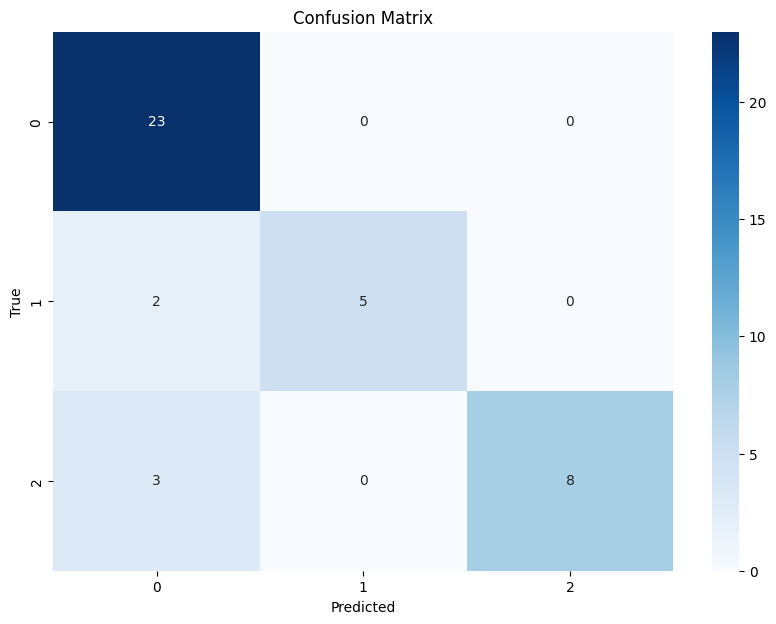

[[23  0  0]
 [ 2  5  0]
 [ 3  0  8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        23
           1       1.00      0.71      0.83         7
           2       1.00      0.73      0.84        11

    accuracy                           0.88        41
   macro avg       0.94      0.81      0.86        41
weighted avg       0.90      0.88      0.87        41



In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

predicted = model.predict(x_test)  # Menggunakan model untuk memprediksi data uji

CM = confusion_matrix(y_test, predicted)  # Membuat confusion matrix dari hasil prediksi

plt.figure(figsize=(10, 7))  # Mengatur ukuran plot
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])  # Visualisasi confusion matrix
plt.xlabel('Predicted')  # Label sumbu x
plt.ylabel('True')  # Label sumbu y
plt.title('Confusion Matrix')  # Judul plot
plt.show()  # Menampilkan plot

print(CM)  # Menampilkan confusion matrix dalam bentuk angka
print("Classification Report:")  
print(classification_report(y_test, predicted))  # Menampilkan precision, recall, f1-score, dan accuracy


In [69]:
pickle.dump(model, open("model_fraud.sav", "wb"))  # Menyimpan model yang telah dilatih ke file 'model_fraud.sav' menggunakan pickle
